In [298]:
import cv2 

img = cv2.imread('./Tulipan.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

256 256 3 3


# Convolutional Neural Networks

# Importar Librerías

In [299]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [300]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [301]:
dirname = os.path.join(os.getcwd(),'E:\Datsets\Flores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  E:\Datsets\Flores\
E:\Datsets\Flores\astilbe 1
E:\Datsets\Flores\iris 7932
E:\Datsets\Flores\rose 10410
E:\Datsets\Flores\sunflower 11152
E:\Datsets\Flores\tulip 11640
Directorios leidos: 5
Imagenes en cada directorio [7933, 10410, 11152, 11640, 11335]
suma Total de imagenes en subdirs: 52470


# Creamos las etiquetas

In [302]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  52470


In [303]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 astilbe
1 iris
2 rose
3 sunflower
4 tulip


In [304]:
images_resized = [cv2.resize(img, (28, 28)) for img in images]
y = np.array(labels)
X = np.array(images_resized, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [305]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (41976, 28, 28, 3) (41976,)
Testing data shape :  (10494, 28, 28, 3) (10494,)


Text(0.5, 1.0, 'Ground Truth : 2')

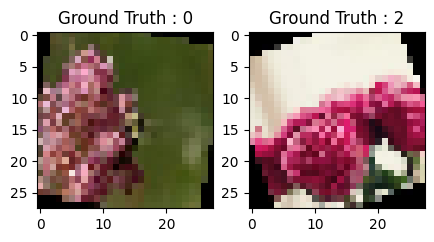

In [306]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

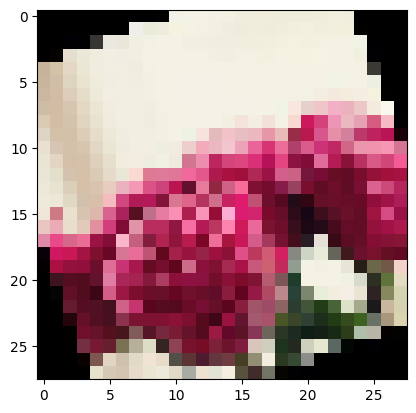

In [307]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [308]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [309]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [310]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(33580, 28, 28, 3) (8396, 28, 28, 3) (33580, 5) (8396, 5)


# Creamos el modelo de CNN

In [311]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 150 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [312]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [313]:
sport_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 flatten_12 (Flatten)        (None, 6272)              0         
                                                                 
 dense_24 (Dense)            (None, 32)                200736    
                                                     

In [314]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [315]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/150


1050/1050 [==============================] - 7s 6ms/step - loss: 1.5142 - accuracy: 0.3287 - val_loss: 1.3443 - val_accuracy: 0.5130
Epoch 2/150
1050/1050 [==============================] - 6s 6ms/step - loss: 1.3262 - accuracy: 0.4473 - val_loss: 1.1524 - val_accuracy: 0.5654
Epoch 3/150
1050/1050 [==============================] - 6s 6ms/step - loss: 1.1987 - accuracy: 0.5097 - val_loss: 1.0269 - val_accuracy: 0.6273
Epoch 4/150
1050/1050 [==============================] - 6s 6ms/step - loss: 1.1151 - accuracy: 0.5565 - val_loss: 0.9511 - val_accuracy: 0.6581
Epoch 5/150
1050/1050 [==============================] - 6s 6ms/step - loss: 1.0551 - accuracy: 0.5813 - val_loss: 0.8985 - val_accuracy: 0.6795
Epoch 6/150
1050/1050 [==============================] - 6s 6ms/step - loss: 1.0150 - accuracy: 0.6015 - val_loss: 0.8603 - val_accuracy: 0.6929
Epoch 7/150
1050/1050 [==============================] - 6s 6ms/step - loss: 0.9814 - accuracy: 0.6189 - val_loss: 0.8341 - val_accuracy: 0.70

In [316]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("D:\IA\CNN\Flores.h5py")

INFO:tensorflow:Assets written to: D:\IA\CNN\Flores.h5py\assets


INFO:tensorflow:Assets written to: D:\IA\CNN\Flores.h5py\assets


# Evaluamos la red

In [317]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

328/328 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8493


In [318]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4291709363460541
Test accuracy: 0.8493424654006958


In [319]:
sport_train.history

{'loss': [1.5141884088516235,
  1.3262284994125366,
  1.1986825466156006,
  1.115057349205017,
  1.055098056793213,
  1.0150142908096313,
  0.9813607335090637,
  0.9564545750617981,
  0.9288645386695862,
  0.9134129285812378,
  0.8933781385421753,
  0.8810509443283081,
  0.8648410439491272,
  0.8484583497047424,
  0.8382871747016907,
  0.8250591158866882,
  0.8180076479911804,
  0.8124011158943176,
  0.8029149174690247,
  0.7948278188705444,
  0.7898556590080261,
  0.7824995517730713,
  0.7762663960456848,
  0.7690668106079102,
  0.766670286655426,
  0.7619134783744812,
  0.7548429369926453,
  0.7518700957298279,
  0.7455754280090332,
  0.7403605580329895,
  0.7341269850730896,
  0.7311902046203613,
  0.729689359664917,
  0.7251706123352051,
  0.7244356274604797,
  0.7189416885375977,
  0.7136425971984863,
  0.7122319340705872,
  0.7066164612770081,
  0.7083138823509216,
  0.7025259137153625,
  0.7021293044090271,
  0.6943289041519165,
  0.6960893273353577,
  0.6944197416305542,
  0.69

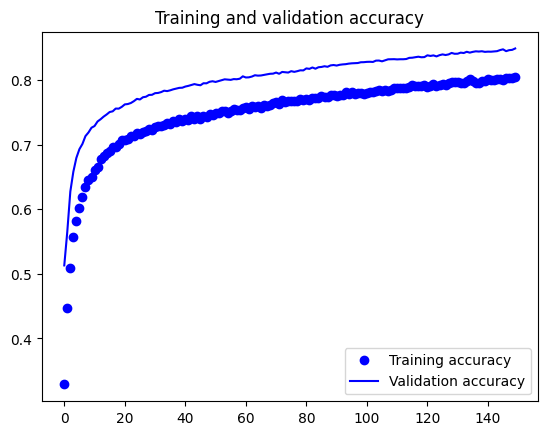

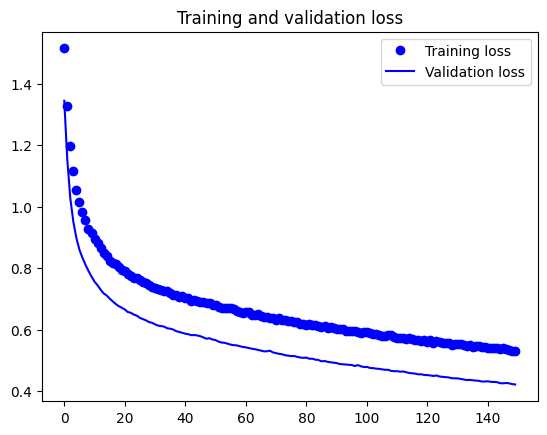

In [320]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [321]:
predicted_classes2 = sport_model.predict(test_X)

328/328 [==============================] - 0s 1ms/step


In [322]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [323]:
predicted_classes.shape, test_Y.shape

((10494,), (10494,))

# Aprendamos de los errores: Qué mejorar

Found 8913 correct labels


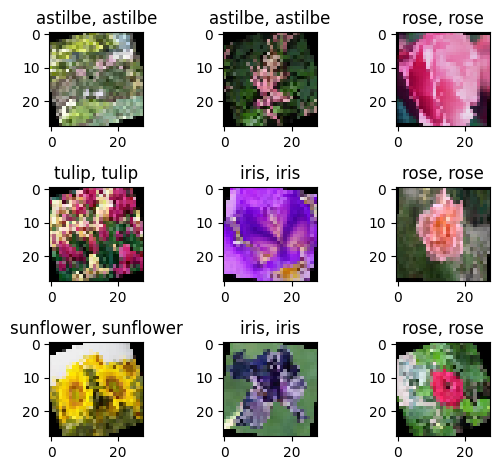

In [324]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 1581 incorrect labels


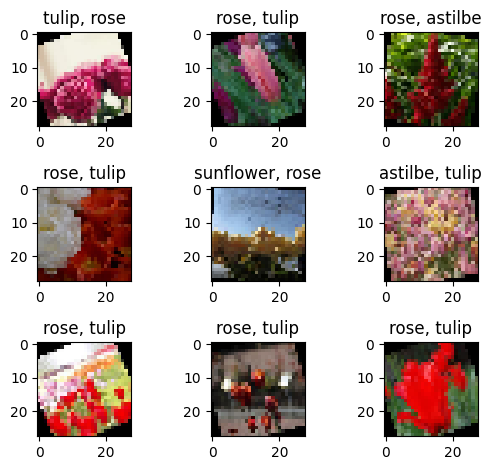

In [325]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [326]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.79      0.79      1590
     Class 1       0.93      0.92      0.93      2041
     Class 2       0.77      0.78      0.77      2244
     Class 3       0.92      0.96      0.94      2343
     Class 4       0.82      0.78      0.80      2276

    accuracy                           0.85     10494
   macro avg       0.85      0.85      0.85     10494
weighted avg       0.85      0.85      0.85     10494

